In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
rcParams['figure.figsize'] = 20,10

df = pd.read_excel('Sales-Ops.xlsx')
df.columns = df.columns.str.replace(' ','_')
df.columns= df.columns.str.strip().str.lower()
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
print('Temos:', df['customer_id'].nunique(),' clientes')
print('Data mínima:', df['order_date'].min())
print('Data máxima:', df['order_date'].max())

Temos: 793  clientes
Data mínima: 2015-01-03 00:00:00
Data máxima: 2018-12-30 00:00:00


In [4]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [5]:
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
dtype: int64

# Análise Exploratória de Dados

In [6]:
import plotly.express as px
import plotly.graph_objects as go

year = df[['order_date', 'sales', 'order_id', 'customer_id', 'quantity']]
year['year'] = year['order_date'].map(lambda x: x.year)
eda_year = year.groupby('year').agg({'sales': 'sum',
                                     'order_id': 'nunique',
                                     'customer_id': 'nunique',
                                     'quantity': 'sum'}).reset_index()
eda_year['ticket_medio'] = round(eda_year['sales'] / eda_year['order_id'], 2)
eda_year['gasto_medio'] = round(eda_year['sales'] / eda_year['customer_id'], 2)
eda_year['frequencia'] = round(eda_year['order_id'] / eda_year['customer_id'], 2)
eda_year['itens_ticket'] = round(eda_year['quantity'] / eda_year['order_id'], 2)
eda_year['preco_medio'] = round(eda_year['ticket_medio'] / eda_year['itens_ticket'], 2)
eda_year['sales'] = round(eda_year['sales'],0)
eda_year['year'] = eda_year['year'].astype(str)
eda_year

,year,sales,order_id,customer_id,quantity,ticket_medio,gasto_medio,frequencia,itens_ticket,preco_medio
0,2015,484247.0,969,595,7581,499.74,813.86,1.63,7.82,63.91
1,2016,470533.0,1038,573,7979,453.31,821.17,1.81,7.69,58.95
2,2017,609206.0,1315,638,9837,463.27,954.87,2.06,7.48,61.93
3,2018,733215.0,1687,693,12476,434.63,1058.03,2.43,7.40,58.73


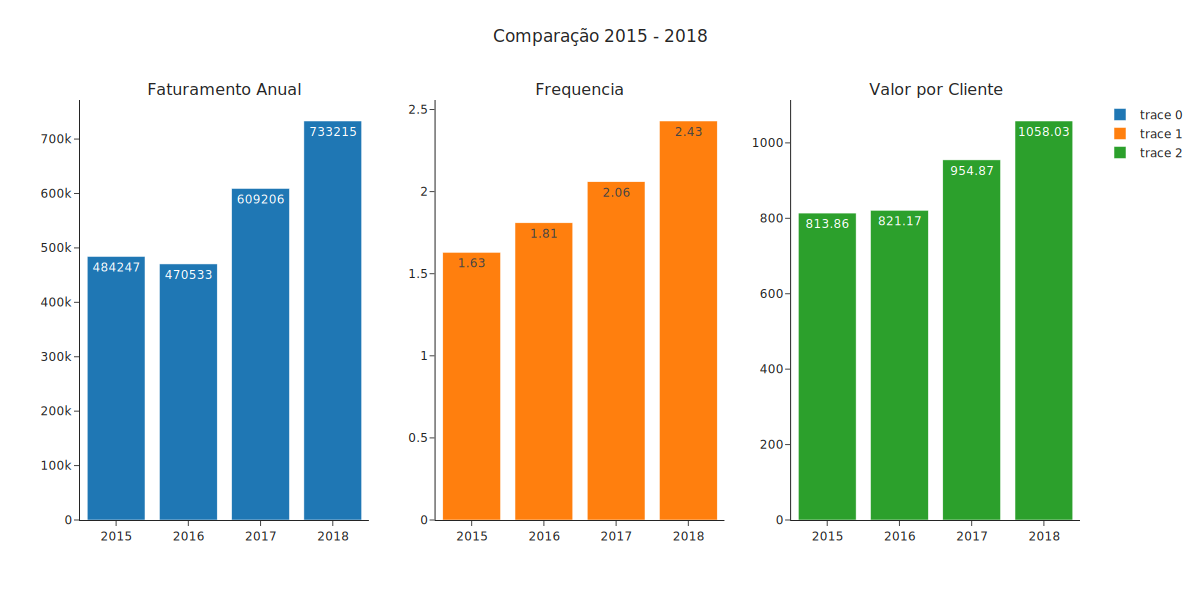

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

fig = make_subplots(rows=1, cols=3,subplot_titles=("Faturamento Anual","Frequencia", "Valor por Cliente"))

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['sales'], text = eda_year['sales'], textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['frequencia'], text = eda_year['frequencia'], textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['gasto_medio'], text = eda_year['gasto_medio'], textangle=0, textposition="inside"),
    row=1, col=3
)

fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

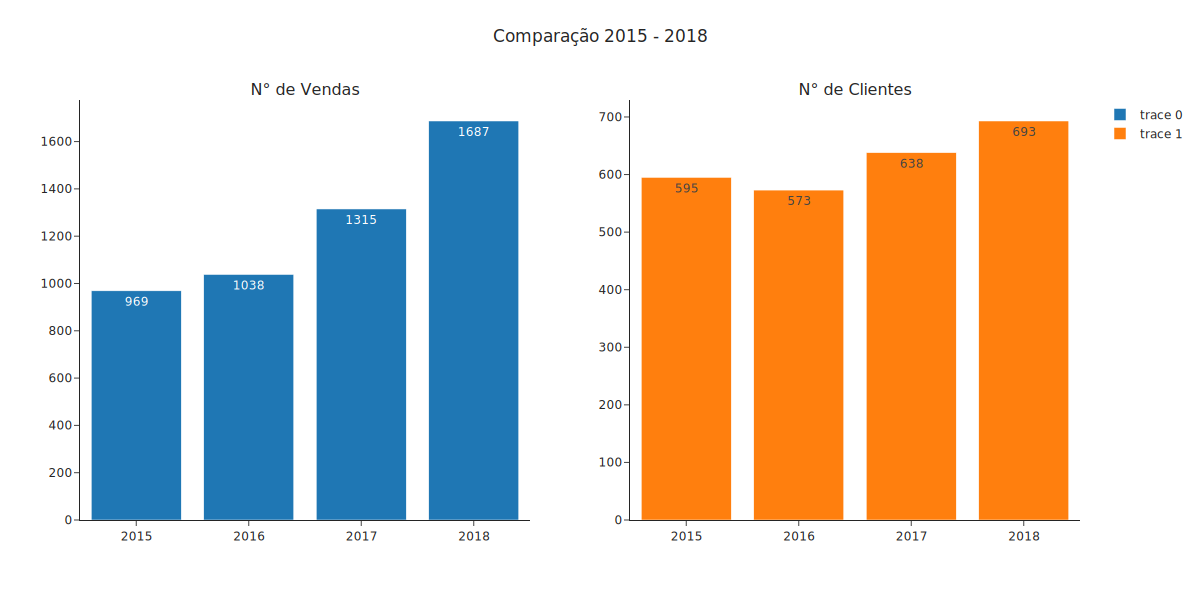

In [8]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("N° de Vendas","N° de Clientes"))

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['order_id'], text = eda_year['order_id'], textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['customer_id'], text = eda_year['customer_id'], textangle=0, textposition="inside"),
    row=1, col=2
)


fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

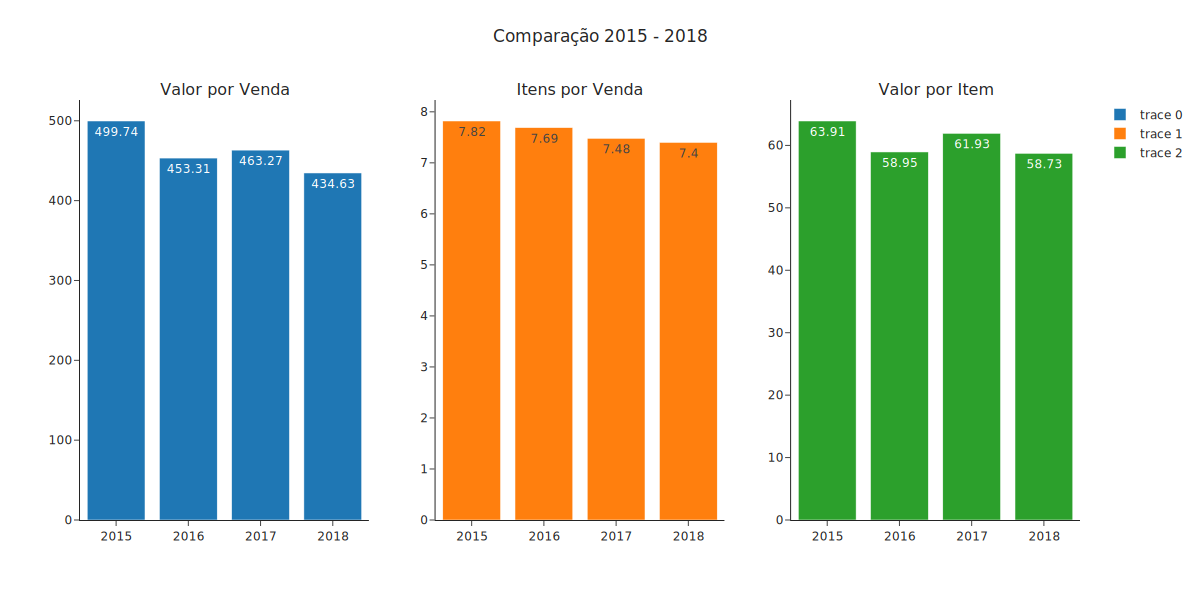

In [9]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Valor por Venda","Itens por Venda", "Valor por Item"))

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['ticket_medio'], text = eda_year['ticket_medio'], textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['itens_ticket'], text = eda_year['itens_ticket'], textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=eda_year['year'], y=eda_year['preco_medio'], text = eda_year['preco_medio'], textangle=0, textposition="inside"),
    row=1, col=3
)

fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

# Primeiras conclusões:

#### Receita anual vem crescendo impulsionada por aumento de gasto por cliente, que por sua vez é impulsionado pelo aumento da frequência de compra dos clientes
#### Valor por venda vem caindo devido queda de itens por venda e pelo preço médio dos itens
#### Número de clientes vem subindo ano a ano, mas não na mesma velocidade do aumento de faturamento.

In [10]:
eda_cat = df[['order_date', 'category', 'sales']]
eda_cat['year'] = eda_cat['order_date'].map(lambda x: x.year)

eda_cat = eda_cat.groupby(['category', 'year'])['sales'].sum().reset_index()
eda_cat

,category,year,sales
0,Furniture,2015,157192.8531
1,Furniture,2016,170518.2370
2,Furniture,2017,198901.4360
3,Furniture,2018,215387.2692
4,Office Supplies,2015,151776.4120
5,Office Supplies,2016,137233.4630
6,Office Supplies,2017,183939.9820
7,Office Supplies,2018,246097.1750
8,Technology,2015,175278.2330
9,Technology,2016,162780.8090


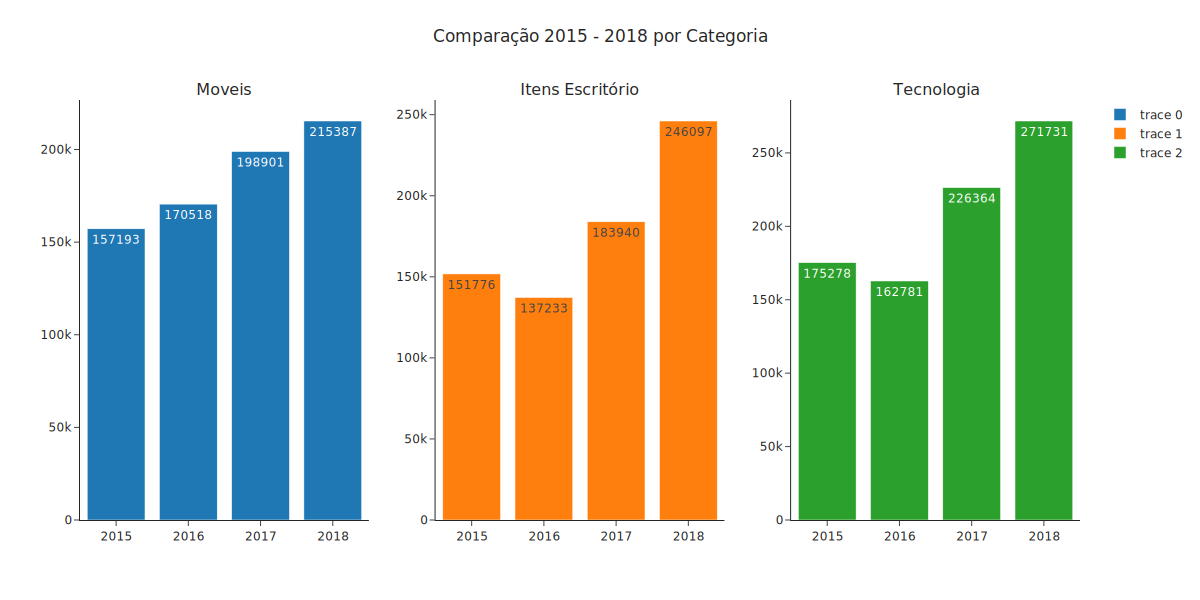

In [11]:
fig = make_subplots(rows=1, cols=3,subplot_titles=("Moveis","Itens Escritório", "Tecnologia"))

fig.add_trace(
    go.Bar(x=eda_cat[eda_cat['category']=='Furniture']['year'], 
           y=eda_cat[eda_cat['category']=='Furniture']['sales'], 
           text = eda_cat[eda_cat['category']=='Furniture']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=eda_cat[eda_cat['category']=='Office Supplies']['year'], 
           y=eda_cat[eda_cat['category']=='Office Supplies']['sales'], 
           text = eda_cat[eda_cat['category']=='Office Supplies']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=eda_cat[eda_cat['category']=='Technology']['year'], 
           y=eda_cat[eda_cat['category']=='Technology']['sales'], 
           text = eda_cat[eda_cat['category']=='Technology']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=3
)

fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018 por Categoria",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

#### Móveis possui crescimento constante, portanto que impulsionou o crescimento de faturamento na proporção que ocorreu foi o crescimento em faturamento de itens de escritório e de tecnologia.

In [12]:
cat2 = df.groupby('category').agg({'customer_id': 'nunique', 'order_id': 'nunique', 'sales': 'sum', 'quantity': 'sum'}).reset_index()
cat2['ticket_medio'] = round(cat2['sales'] / cat2['order_id'], 2)
cat2['gasto_medio'] = round(cat2['sales'] / cat2['customer_id'], 2)
cat2['frequencia'] = round(cat2['order_id'] / cat2['customer_id'], 2)
cat2['itens_ticket'] = round(cat2['quantity'] / cat2['order_id'], 2)
cat2['preco_medio'] = round(cat2['ticket_medio'] / cat2['itens_ticket'], 2)
cat2

,category,customer_id,order_id,sales,quantity,ticket_medio,gasto_medio,frequencia,itens_ticket,preco_medio
0,Furniture,707,1764,741999.7953,8028,420.63,1049.50,2.50,4.55,92.45
1,Office Supplies,788,3742,719047.0320,22906,192.16,912.50,4.75,6.12,31.40
2,Technology,687,1544,836154.0330,6939,541.55,1217.11,2.25,4.49,120.61


In [13]:
cat3 = df[['category', 'sub-category', 'sales', 'order_date']] 
cat3['year'] = cat3['order_date'].map(lambda x: x.year) 
cat3 = cat3[cat3['category']=='Furniture'].groupby(['year','sub-category'])['sales'].sum().reset_index()
cat3

,year,sub-category,sales
0,2015,Bookcases,20036.6776
1,2015,Chairs,77241.5760
2,2015,Furnishings,13826.2340
3,2015,Tables,46088.3655
4,2016,Bookcases,38543.5725
5,2016,Chairs,71734.5290
6,2016,Furnishings,21089.7120
7,2016,Tables,39150.4235
8,2017,Bookcases,26275.4665
9,2017,Chairs,83918.6450


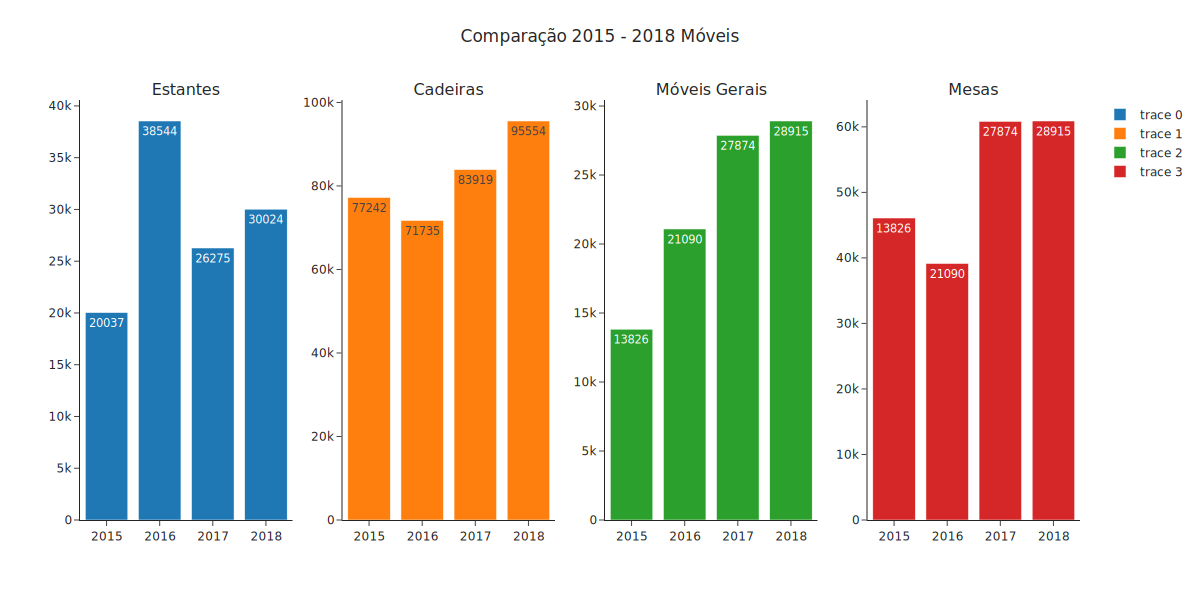

In [14]:
fig = make_subplots(rows=1, cols=4,subplot_titles=("Estantes","Cadeiras", "Móveis Gerais", 'Mesas'))

fig.add_trace(
    go.Bar(x=cat3[cat3['sub-category']=='Bookcases']['year'], 
           y=cat3[cat3['sub-category']=='Bookcases']['sales'], 
           text = cat3[cat3['sub-category']=='Bookcases']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=cat3[cat3['sub-category']=='Chairs']['year'], 
           y=cat3[cat3['sub-category']=='Chairs']['sales'], 
           text = cat3[cat3['sub-category']=='Chairs']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=cat3[cat3['sub-category']=='Furnishings']['year'], 
           y=cat3[cat3['sub-category']=='Furnishings']['sales'], 
           text = cat3[cat3['sub-category']=='Furnishings']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x=cat3[cat3['sub-category']=='Tables']['year'], 
           y=cat3[cat3['sub-category']=='Tables']['sales'], 
           text = cat3[cat3['sub-category']=='Furnishings']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=4
)

fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018 Móveis",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

### Oportunidade em Móveis Gerais e Mesas que ficaram com receita praticamente Flat de 2017 para 2018. Como fazer estes itens continuarem crescendo ano a ano?
### Algo deu muito certo em vendas de Estantes em 2016.

In [15]:
cat4 = df[['category', 'sub-category', 'sales', 'order_date']] 
cat4['year'] = cat4['order_date'].map(lambda x: x.year) 
cat4 = cat4[cat4['category']=='Office Supplies'].groupby(['year','sub-category'])['sales'].sum().reset_index()
cat4

,year,sub-category,sales
0,2015,Appliances,15313.625
1,2015,Art,6057.982
2,2015,Binders,43488.265
3,2015,Envelopes,3855.750
4,2015,Fasteners,661.328
5,2015,Labels,2841.394
6,2015,Paper,14834.956
7,2015,Storage,50329.042
8,2015,Supplies,14394.070
9,2016,Appliances,23241.289


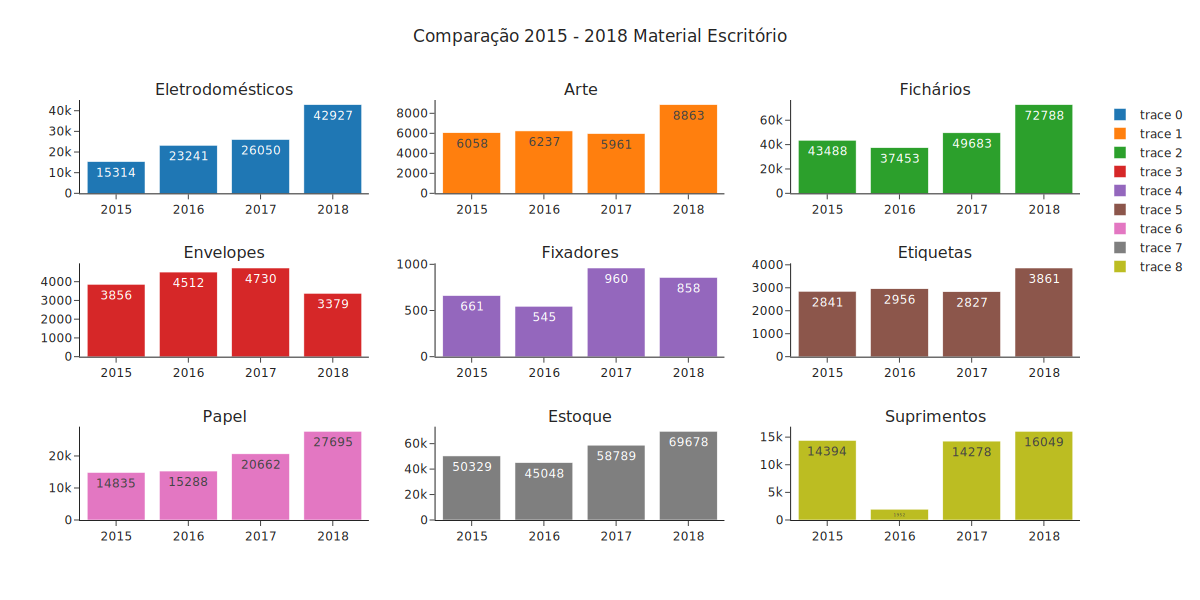

In [16]:
fig = make_subplots(rows=3, cols=3,subplot_titles=("Eletrodomésticos", "Arte", "Fichários", 'Envelopes', 'Fixadores', 'Etiquetas',
                                                    'Papel', 'Estoque', 'Suprimentos'))

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Appliances']['year'], 
           y=cat4[cat4['sub-category']=='Appliances']['sales'], 
           text = cat4[cat4['sub-category']=='Appliances']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Art']['year'], 
           y=cat4[cat4['sub-category']=='Art']['sales'], 
           text = cat4[cat4['sub-category']=='Art']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Binders']['year'], 
           y=cat4[cat4['sub-category']=='Binders']['sales'], 
           text = cat4[cat4['sub-category']=='Binders']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Envelopes']['year'], 
           y=cat4[cat4['sub-category']=='Envelopes']['sales'], 
           text = cat4[cat4['sub-category']=='Envelopes']['sales'].round(0), textangle=0, textposition="inside"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Fasteners']['year'], 
           y=cat4[cat4['sub-category']=='Fasteners']['sales'], 
           text = cat4[cat4['sub-category']=='Fasteners']['sales'].round(0), textangle=0, textposition="inside"),
    row=2, col=2
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Labels']['year'], 
           y=cat4[cat4['sub-category']=='Labels']['sales'], 
           text = cat4[cat4['sub-category']=='Labels']['sales'].round(0), textangle=0, textposition="inside"),
    row=2, col=3
    
)
fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Paper']['year'], 
           y=cat4[cat4['sub-category']=='Paper']['sales'], 
           text = cat4[cat4['sub-category']=='Paper']['sales'].round(0), textangle=0, textposition="inside"),
    row=3, col=1
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Storage']['year'], 
           y=cat4[cat4['sub-category']=='Storage']['sales'], 
           text = cat4[cat4['sub-category']=='Storage']['sales'].round(0), textangle=0, textposition="inside"),
    row=3, col=2
)

fig.add_trace(
    go.Bar(x=cat4[cat4['sub-category']=='Supplies']['year'], 
           y=cat4[cat4['sub-category']=='Supplies']['sales'], 
           text = cat4[cat4['sub-category']=='Supplies']['sales'].round(0), textangle=0, textposition="inside"),
    row=3, col=3
)




fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018 Material Escritório",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


fig.show()

In [17]:
cat5 = df[['category', 'sub-category', 'sales', 'order_date']] 
cat5['year'] = cat5['order_date'].map(lambda x: x.year) 
cat5 = cat5[cat5['category']=='Technology'].groupby(['year','sub-category'])['sales'].sum().reset_index()
cat5

,year,sub-category,sales
0,2015,Accessories,25014.272
1,2015,Copiers,10849.782
2,2015,Machines,62023.373
3,2015,Phones,77390.806
4,2016,Accessories,40523.960
5,2016,Copiers,26179.450
6,2016,Machines,27763.697
7,2016,Phones,68313.702
8,2017,Accessories,41895.854
9,2017,Copiers,49599.410


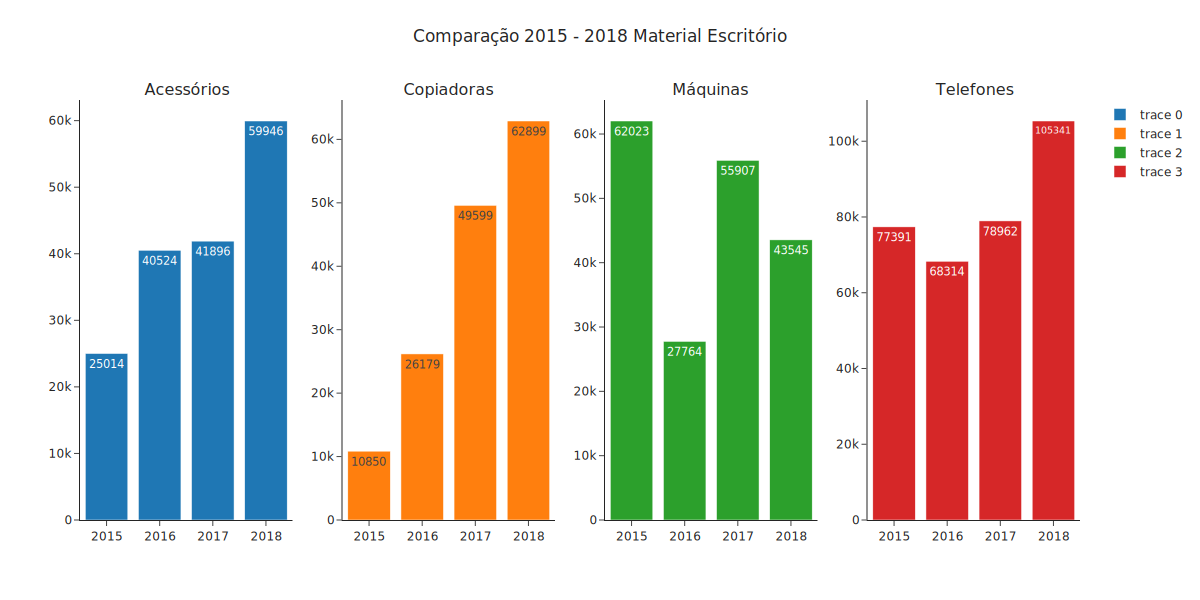

In [18]:
fig = make_subplots(rows=1, cols=4,subplot_titles=("Acessórios", "Copiadoras", "Máquinas", 'Telefones'))

fig.add_trace(
    go.Bar(x=cat5[cat5['sub-category']=='Accessories']['year'], 
           y=cat5[cat5['sub-category']=='Accessories']['sales'], 
           text = cat5[cat5['sub-category']=='Accessories']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=cat5[cat5['sub-category']=='Copiers']['year'], 
           y=cat5[cat5['sub-category']=='Copiers']['sales'], 
           text = cat5[cat5['sub-category']=='Copiers']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=cat5[cat5['sub-category']=='Machines']['year'], 
           y=cat5[cat5['sub-category']=='Machines']['sales'], 
           text = cat5[cat5['sub-category']=='Machines']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x=cat5[cat5['sub-category']=='Phones']['year'], 
           y=cat5[cat5['sub-category']=='Phones']['sales'], 
           text = cat5[cat5['sub-category']=='Phones']['sales'].round(0), textangle=0, textposition="inside"),
    row=1, col=4
)




fig.update_layout(height=600, width=1200, title_text="Comparação 2015 - 2018 Material Escritório",template= 'simple_white',
                title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})


# Conclusão

### Nem todas categorias acompanharam o crescimento de faturamento da empresa, havendo oportunidades em algumas delas.
### O número de clientes e a frequência de compras vem aumentando, porém o valor por compra vem caindo devido redução da quantidade de itens por venda e também do preço médio dos itens.

## Oportunidade:
### Aumentar o valor por compra dos clientes, gerando maior receita para a empresa com o mesmo número de clientes.
## Como? 
### Através de campanhas personalizadas de relacionamento com o cliente (CRM) é possível alavancar o gasto dos clientes por venda. 
## Como personalizar campanhas?

# Clusterização (segmentação) de clientes para ofertas mais personalizadas e certeiras, alavancando o gasto médio do cliente e também reduzindo gastos em marketing devido campanhas direcionadas a públicos segmentados.

___________________________________________________________________________________________________________________________________________________________________

# Tratamento dos dados para modelagem

In [19]:
df['recencia'] = df['order_date'].max() - df['order_date']
df['recencia'] = df['recencia'].dt.days.astype('int16')

In [20]:
clientes = df.groupby('customer_id').agg({'recencia' : 'min', 
                                          'order_id': 'nunique', 
                                          'sales': 'sum',
                                          'product_id': 'nunique',
                                          'category': 'nunique',
                                          'sub-category': 'nunique',
                                          'quantity': 'sum'                                                                                
                                         }).reset_index()
clientes.columns = ['customer_id', 'recencia', 'frequencia', 'valor', 'produtos', 'categorias', 'sub-categorias', 'itens']
clientes.head()

,customer_id,recencia,frequencia,valor,produtos,categorias,sub-categorias,itens
0,AA-10315,184,5,5563.560,11,3,9,30
1,AA-10375,19,9,1056.390,15,3,7,41
2,AA-10480,259,4,1790.512,12,3,7,36
3,AA-10645,55,6,5086.935,18,3,9,64
4,AB-10015,415,3,886.156,6,3,5,13


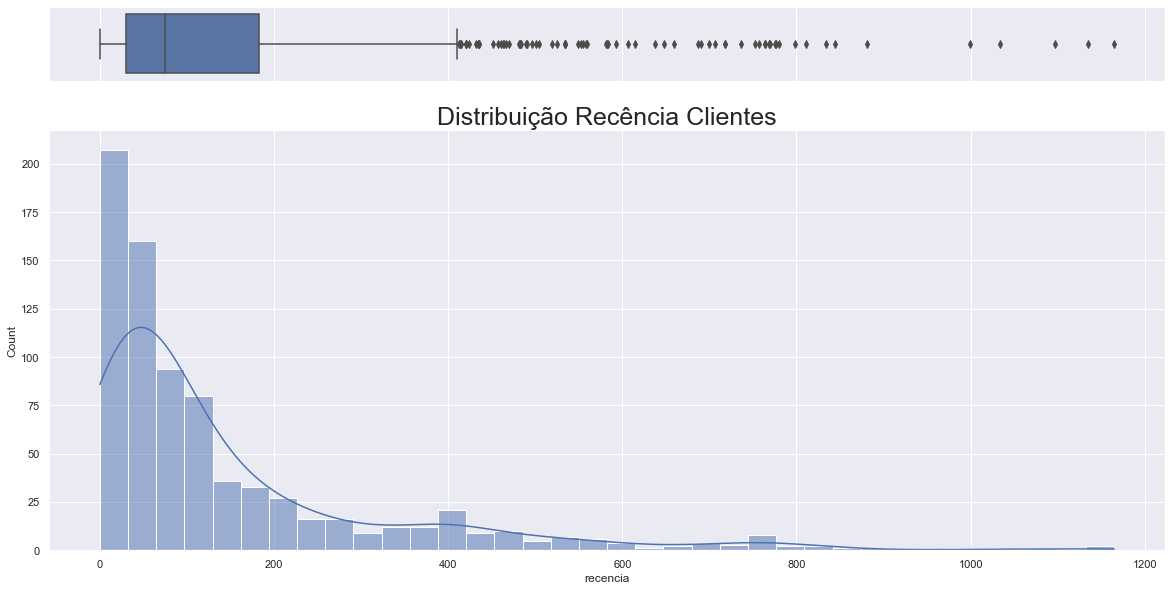

In [21]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax

sns.boxplot(clientes["recencia"], ax=ax_box)
sns.histplot(data=clientes, x="recencia", ax=ax_hist,kde=True)
plt.title('Distribuição Recência Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

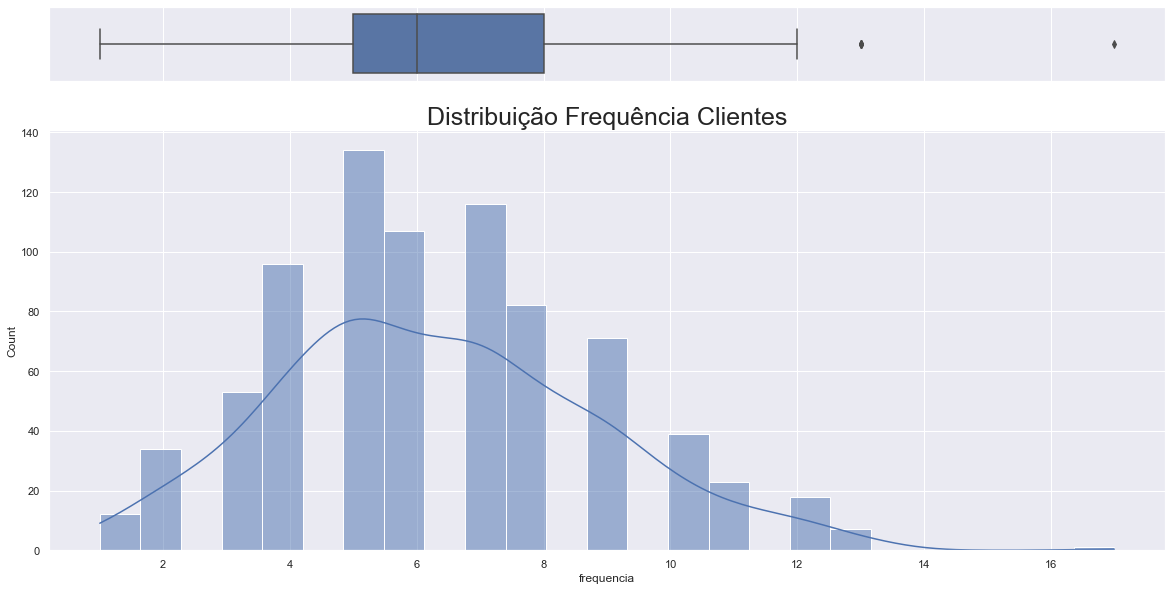

In [22]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["frequencia"], ax=ax_box)
sns.histplot(data=clientes, x="frequencia", ax=ax_hist,kde=True)
plt.title('Distribuição Frequência Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

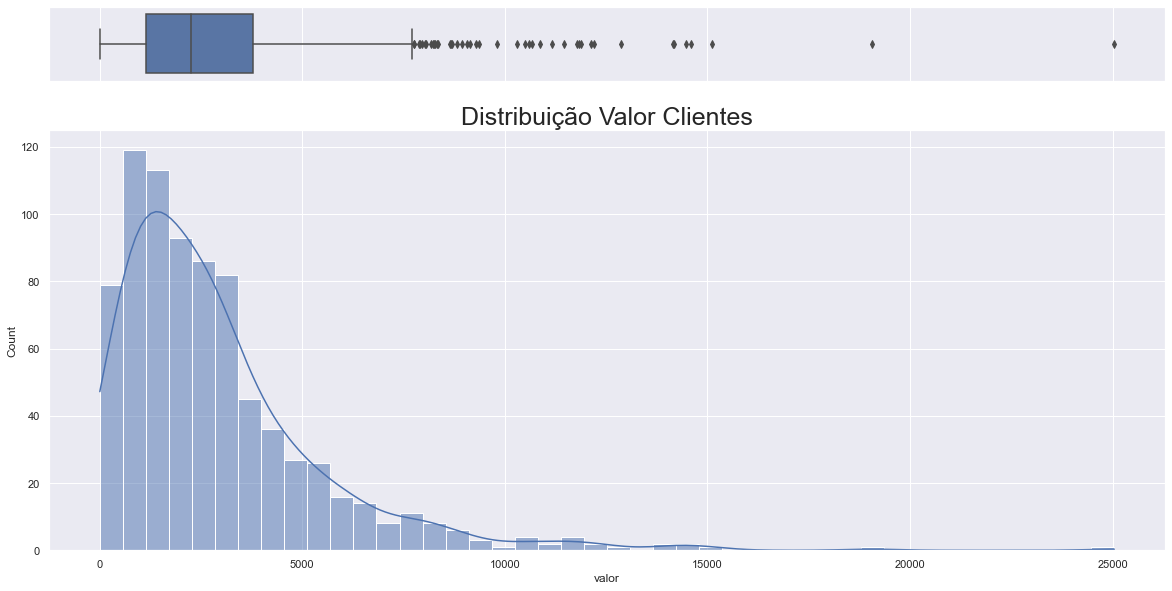

In [23]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["valor"], ax=ax_box)
sns.histplot(data=clientes, x="valor", ax=ax_hist,kde=True)
plt.title('Distribuição Valor Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

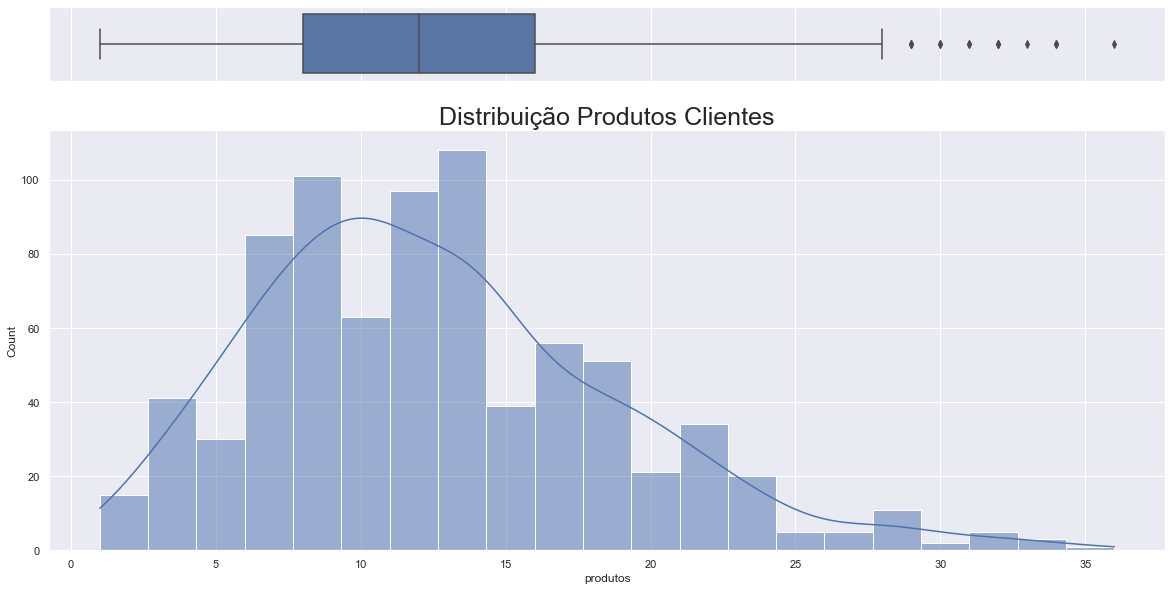

In [24]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["produtos"], ax=ax_box)
sns.histplot(data=clientes, x="produtos", ax=ax_hist,kde=True)
plt.title('Distribuição Produtos Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

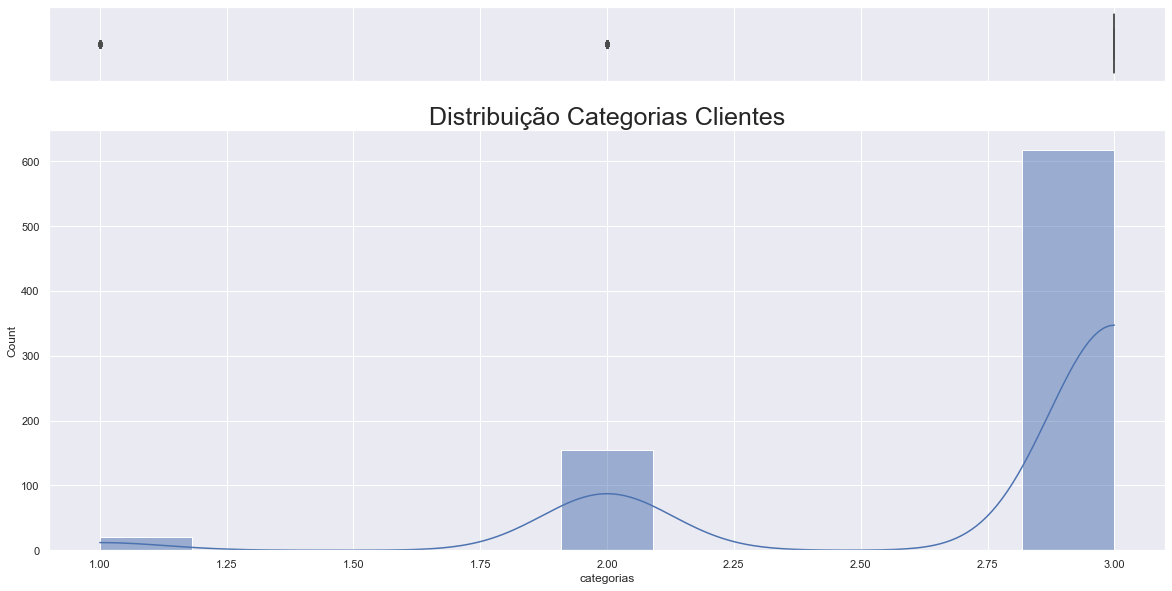

In [25]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["categorias"], ax=ax_box)
sns.histplot(data=clientes, x="categorias", ax=ax_hist,kde=True)
plt.title('Distribuição Categorias Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

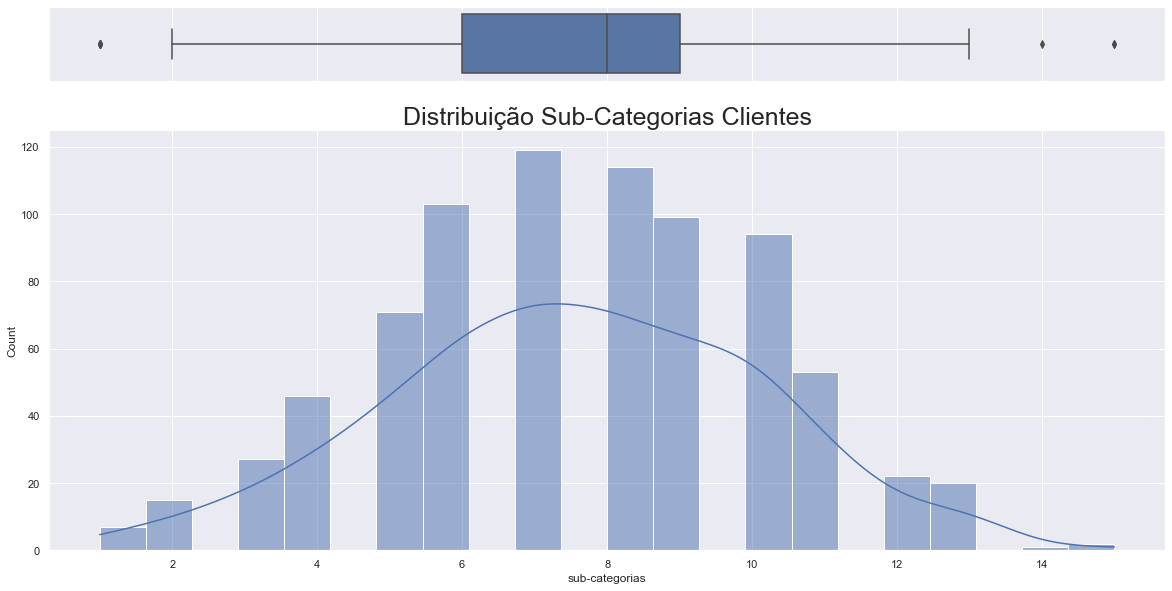

In [26]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["sub-categorias"], ax=ax_box)
sns.histplot(data=clientes, x="sub-categorias", ax=ax_hist,kde=True)
plt.title('Distribuição Sub-Categorias Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

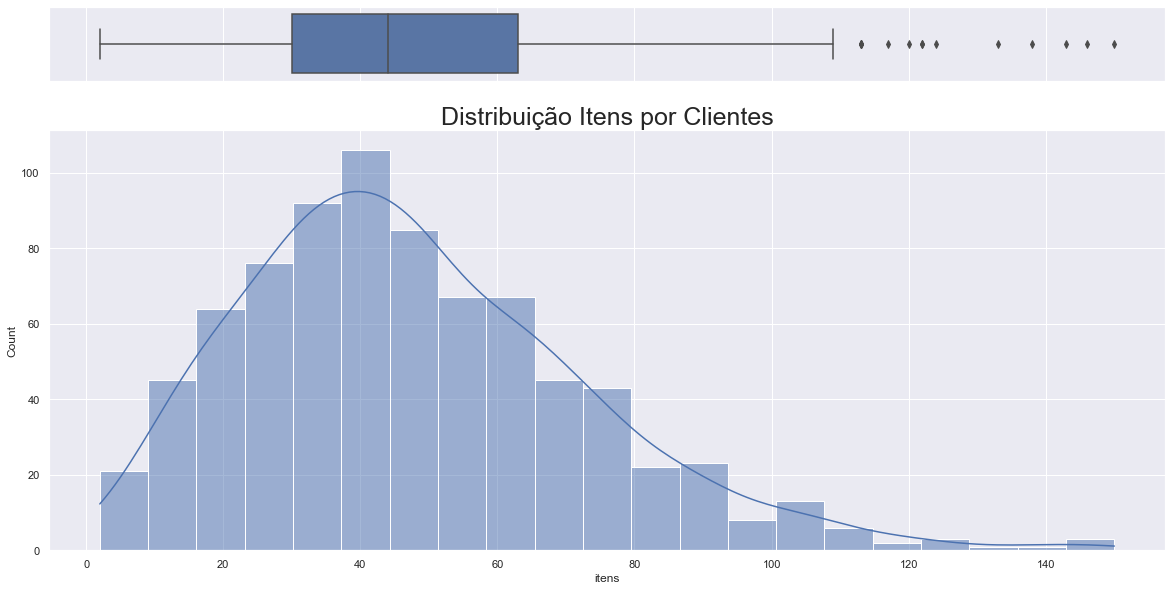

In [27]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes["itens"], ax=ax_box)
sns.histplot(data=clientes, x="itens", ax=ax_hist,kde=True)
plt.title('Distribuição Itens por Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

### Remoção de Outliers de Valor

In [28]:
threshold_max_valor = clientes['valor'].mean() + 3 * clientes['valor'].std()
print('Número de clientes antes de remoção de outliers: ', clientes['customer_id'].nunique())
clientes1 = clientes[clientes['valor'] <= threshold_max_valor]
print('Número de clientes antes de remoção de outliers: ', clientes1['customer_id'].nunique())
print('Número de outliers: ', clientes['customer_id'].nunique() - clientes1['customer_id'].nunique())

Número de clientes antes de remoção de outliers:  793
Número de clientes antes de remoção de outliers:  777
Número de outliers:  16


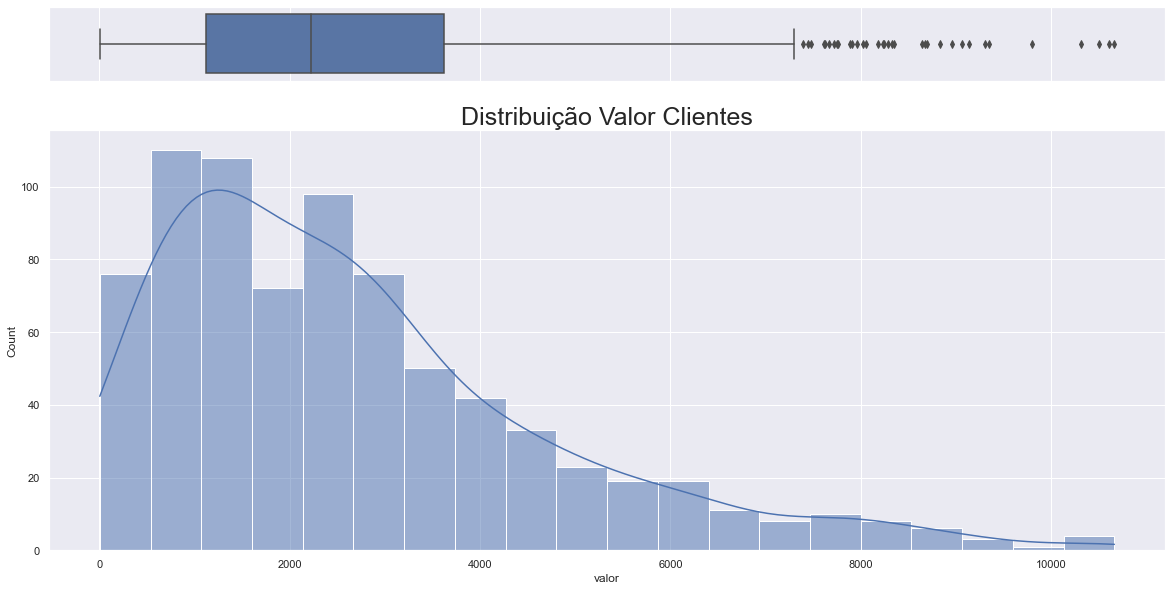

In [29]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax
sns.boxplot(clientes1["valor"], ax=ax_box)
sns.histplot(data=clientes1, x="valor", ax=ax_hist,kde=True)
plt.title('Distribuição Valor Clientes',fontsize=25)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

### Lidando com as variáveis categóricas

In [30]:
# Quantas categorias temos?
df[['ship_mode', 'segment', 'country', 'city', 'state', 'region', 'product_id', 'category', 'sub-category']].nunique()

ship_mode          4
segment            3
country            1
city             531
state             49
region             4
product_id      1862
category           3
sub-category      17
dtype: int64

In [31]:
ship_mode = df[['customer_id', 'ship_mode', 'order_id']]
ship_mode = pd.DataFrame(ship_mode.groupby(['customer_id','ship_mode'])['order_id'].nunique())
ship_mode = ship_mode.reset_index()
ship_mode['ship_mode'].unique()

array(['First Class', 'Standard Class', 'Second Class', 'Same Day'],
      dtype=object)

In [32]:
# Atribuindo quantas vendas tivemos por cliente para cada modo de transporte ao cliente.

ship_first_class = ship_mode[ship_mode['ship_mode']=='First Class'][['customer_id','order_id']]
ship_first_class.columns = ['customer_id', 'ship_first_class']

ship_second_class = ship_mode[ship_mode['ship_mode']=='Second Class'][['customer_id','order_id']]
ship_second_class.columns = ['customer_id', 'ship_second_class']

ship_same_day = ship_mode[ship_mode['ship_mode']=='Same Day'][['customer_id','order_id']]
ship_same_day.columns = ['customer_id', 'ship_same_day']

ship_standard_class = ship_mode[ship_mode['ship_mode']=='Standard Class'][['customer_id','order_id']]
ship_standard_class.columns = ['customer_id', 'ship_standard_class']

In [33]:
# One hot encoding para a variável segmento de clientes
segment = df[['customer_id', 'segment']].drop_duplicates()
s = pd.get_dummies(segment['segment'])
segment['segment_consumer'] = s['Consumer']
segment['segment_corporate'] = s['Corporate']
segment['segment_homeoffice'] = s['Home Office']
segment = segment.drop('segment', axis = 1)
segment.shape

(793, 4)

In [34]:
cat = df[['customer_id', 'category', 'quantity']]
cat = pd.DataFrame(cat.groupby(['customer_id','category'])['quantity'].count())
cat.columns=['qte_itens']
cat = cat.reset_index()
cat['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [35]:
# Atribuindo a quantidade de vendas para cada cliente para cada categoria de produtos.
cat_furniture = cat[cat['category']=='Furniture'][['customer_id','qte_itens']]
cat_furniture.columns = ['customer_id', 'itens_furniture']

cat_office = cat[cat['category']=='Office Supplies'][['customer_id','qte_itens']]
cat_office.columns = ['customer_id', 'itens_office']

cat_tech = cat[cat['category']=='Technology'][['customer_id','qte_itens']]
cat_tech.columns = ['customer_id', 'itens_tech']

In [36]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'recencia'],
      dtype='object')

In [37]:
#Fazendo merge para um dataframe final com os dados e as tabelas de variáveis categóricas.

clientes_final = pd.merge(clientes1, ship_first_class, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, ship_second_class, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, ship_standard_class, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, ship_same_day, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, segment, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, cat_furniture, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, cat_office, how = 'left', on = 'customer_id')
clientes_final = pd.merge(clientes_final, cat_tech, how = 'left', on = 'customer_id')
clientes_final.isnull().sum()

customer_id              0
recencia                 0
frequencia               0
valor                    0
produtos                 0
categorias               0
sub-categorias           0
itens                    0
ship_first_class       295
ship_second_class      237
ship_standard_class     19
ship_same_day          553
segment_consumer         0
segment_corporate        0
segment_homeoffice       0
itens_furniture         85
itens_office             5
itens_tech             106
dtype: int64

In [38]:
# Vamos substituir os faltantes por 0 pois são apenas as categóricas
clientes_final = clientes_final.fillna(0)
clientes_final.head().T

,0,1,2,3,4
customer_id,AA-10315,AA-10375,AA-10480,AA-10645,AB-10015
recencia,184,19,259,55,415
frequencia,5,9,4,6,3
valor,5563.56,1056.39,1790.512,5086.935,886.156
produtos,11,15,12,18,6
categorias,3,3,3,3,3
sub-categorias,9,7,7,9,5
itens,30,41,36,64,13
ship_first_class,1.0,2.0,0.0,2.0,2.0
ship_second_class,0.0,1.0,0.0,0.0,0.0


In [39]:
clientes_final.shape

(777, 18)

# Modelo de Segmentação de Clientes

### Método cotovelo

In [40]:
# Método colovelo para KMeans

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clientes_final.drop('customer_id', axis=1))
    Sum_of_squared_distances.append(km.inertia_)

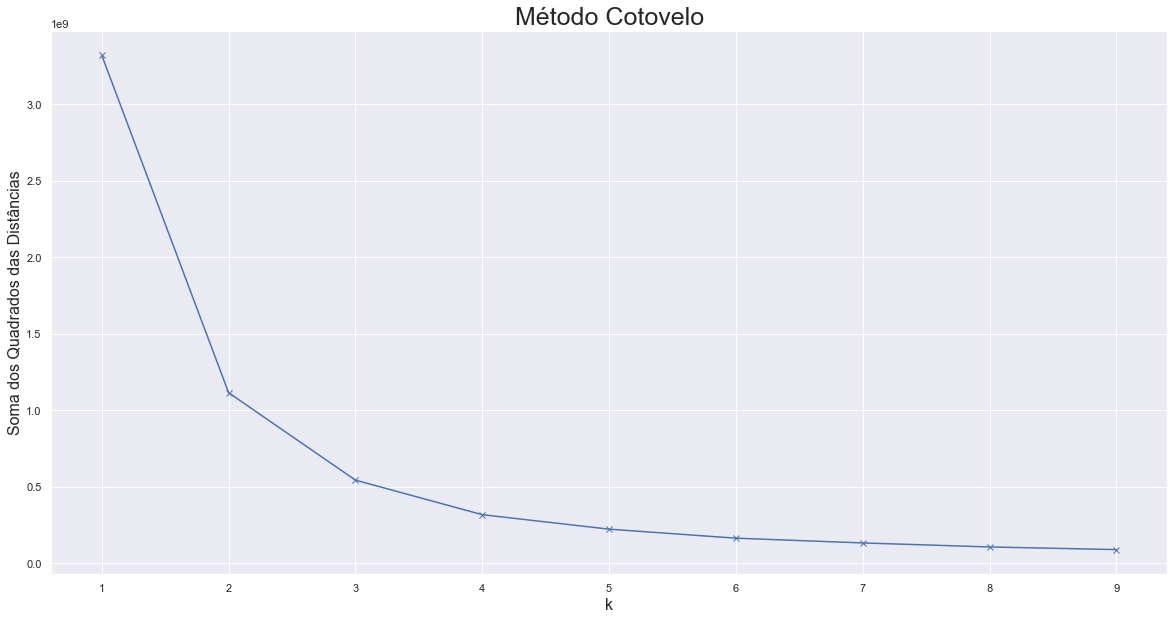

In [41]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Soma dos Quadrados das Distâncias', fontsize = 16)
plt.title('Método Cotovelo', fontsize = 25)
plt.show()

### A partir de K = 4 há uma redução baixa do erro. Será testado KMeans para 4 e 5 clusters. 
### Mas primeiramente foi checada a correlação de Pearson entre as variáveis do dataframe

In [42]:
X = clientes_final.drop('customer_id', axis=1)

In [43]:
X.columns

Index(['recencia', 'frequencia', 'valor', 'produtos', 'categorias',
       'sub-categorias', 'itens', 'ship_first_class', 'ship_second_class',
       'ship_standard_class', 'ship_same_day', 'segment_consumer',
       'segment_corporate', 'segment_homeoffice', 'itens_furniture',
       'itens_office', 'itens_tech'],
      dtype='object')

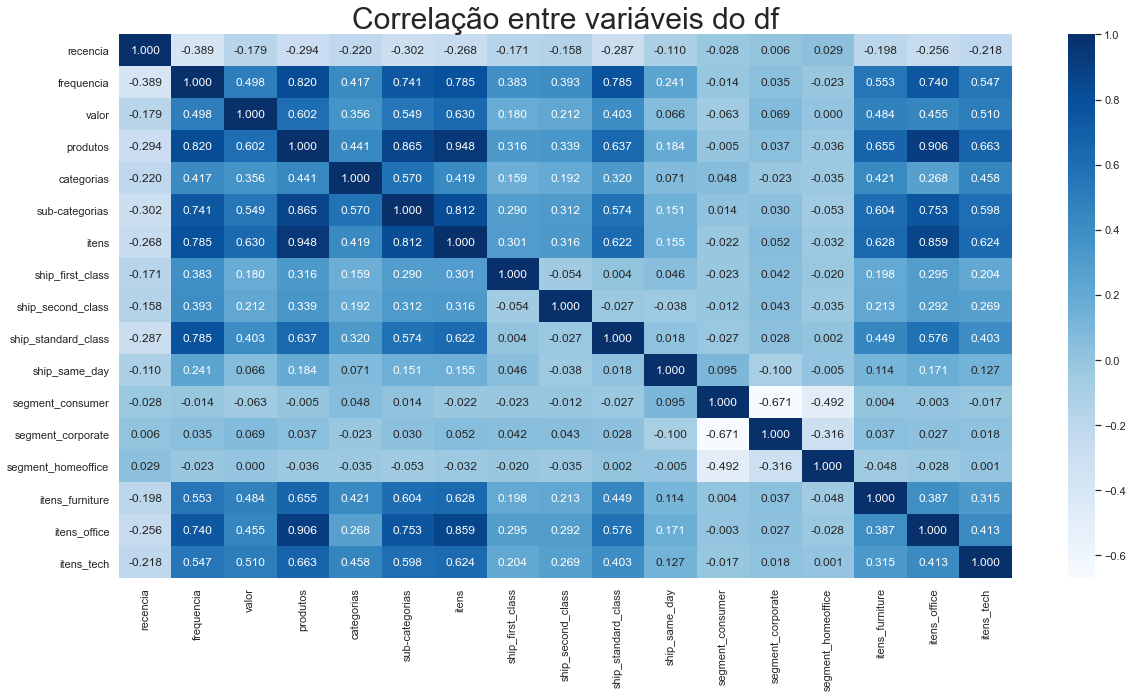

In [44]:
plt.figure(figsize = (20,10))

sns.heatmap(X.corr(),
            annot = True,
            fmt = '.3f',
            cmap='Blues')
plt.title('Correlação entre variáveis do df', fontsize = 30)
plt.show()

## Há uma correlação positiva mais alta entre o valor gasto do cliente e as variáveis:
### Frequência de compras
### Número de produtos diferentes comprados
### Número de categorias diferentes compradas
### Número total de itens comprados e itens de cada categoria
## Há uma baixa correlação entre o valor gasto e as variáveis:
### Categorias, tipo de frete e tipo de cliente.
## Há uma correlação negativa com a recência (tempo desde a útlima compra), ou seja, clientes com menor recência tendem a ter maior valor gasto.

# KMeans para n clusters = 4

In [45]:
kmeans = KMeans(n_clusters = 4).fit(X)
y_kmeans = kmeans.predict(X)

resultado = clientes_final
resultado['cluster'] = y_kmeans

final = resultado.groupby('cluster').agg({'customer_id': 'nunique',
                                          'recencia': 'mean',
                                          'frequencia': 'mean',
                                          'valor': 'mean',
                                          'produtos': 'mean',
                                          'categorias': 'mean',
                                          'sub-categorias': 'mean',
                                          'itens': 'mean',
                                          'ship_first_class': 'mean',
                                          'ship_second_class': 'mean',
                                          'ship_standard_class': 'mean',
                                          'ship_same_day': 'mean',
                                          'segment_consumer': 'sum',
                                          'segment_corporate': 'sum', 
                                          'segment_homeoffice': 'sum',
                                          'itens_furniture': 'mean',
                                          'itens_office': 'mean',
                                          'itens_tech': 'mean'
                                         }).reset_index()

final['%_consumer'] = round(final['segment_consumer'] / final['customer_id']*100, 1)
final['%_corporate'] = round(final['segment_corporate'] / final['customer_id']*100, 1)
final['%_homeoffice'] = round(final['segment_homeoffice'] / final['customer_id']*100, 1) 
final['%_clientes'] = round(final['customer_id'] / np.sum(final['customer_id'])*100, 1) 
final['%_receita'] = round(final['valor'] * final['customer_id'] / np.sum(final['valor'] * final['customer_id'])*100, 1) 
final.T

,0,1,2,3
cluster,0.000000,1.000000,2.000000,3.000000
customer_id,265.000000,55.000000,133.000000,324.000000
recencia,121.626415,131.836364,90.135338,193.805556
frequencia,6.909434,8.309091,7.699248,4.854938
valor,2655.838766,7841.213356,4745.074429,951.274116
produtos,13.769811,18.981818,16.360902,8.552469
categorias,2.898113,2.963636,2.909774,2.521605
sub-categorias,8.233962,9.563636,9.218045,5.891975
itens,52.181132,75.727273,64.661654,31.231481
ship_first_class,1.083019,1.236364,1.225564,0.768519


# KMeans para n clusters = 5

In [46]:
# os centros foram pré definidos para sempre manter o mesmo cluster com o mesmo label

centers = np.array([[1.98844291e+02, 4.70934256e+00, 8.61791426e+02, 8.12802768e+00,
                    2.47750865e+00, 5.69550173e+00, 2.95501730e+01, 7.43944637e-01,
                    9.30795848e-01, 2.77508651e+00, 2.59515571e-01, 5.39792388e-01,
                    2.59515571e-01, 2.00692042e-01, 1.56401384e+00, 5.40830450e+00,
                    1.20069204e+00],

                    [1.00888889e+02, 7.39583333e+00, 3.70383716e+03, 1.50833333e+01,
                    2.94444444e+00, 8.88888889e+00, 5.84305556e+01, 1.13888889e+00,
                    1.38888889e+00, 4.47916667e+00, 3.88888889e-01, 5.13888889e-01,
                    3.26388889e-01, 1.59722222e-01, 3.25694444e+00, 8.87500000e+00,
                    3.00000000e+00],

                    [1.37000000e+02, 8.52631579e+00, 8.40527808e+03, 2.05000000e+01,
                    2.97368421e+00, 9.86842105e+00, 8.14210526e+01, 1.15789474e+00,
                    1.68421053e+00, 5.34210526e+00, 3.42105263e-01, 4.21052632e-01,
                    4.21052632e-01, 1.57894737e-01, 4.97368421e+00, 1.17894737e+01,
                    3.86842105e+00],

                    [8.84567901e+01, 8.00000000e+00, 5.63897138e+03, 1.74320988e+01,
                    2.88888889e+00, 9.35802469e+00, 6.92345679e+01, 1.37037037e+00,
                    1.50617284e+00, 4.76543210e+00, 3.58024691e-01, 4.69135802e-01,
                    2.83950617e-01, 2.46913580e-01, 3.61728395e+00, 1.01975309e+01,
                    3.75308642e+00],

                    [1.32880000e+02, 6.60888889e+00, 2.29246310e+03, 1.30133333e+01,
                    2.88000000e+00, 7.92888889e+00, 4.91377778e+01, 1.03555556e+00,
                    1.27555556e+00, 3.91111111e+00, 3.86666667e-01, 5.02222222e-01,
                    3.24444444e-01, 1.73333333e-01, 2.86222222e+00, 7.75111111e+00,
                    2.44888889e+00]])



In [47]:
kmeans = KMeans(n_clusters = 5, init = centers).fit(X)
y_kmeans = kmeans.predict(X)

resultado = clientes_final
resultado['cluster'] = y_kmeans

final = resultado.groupby('cluster').agg({'customer_id': 'nunique',
                                          'recencia': 'mean',
                                          'frequencia': 'mean',
                                          'valor': 'mean',
                                          'produtos': 'mean',
                                          'categorias': 'mean',
                                          'sub-categorias': 'mean',
                                          'itens': 'mean',
                                          'ship_first_class': 'sum',
                                          'ship_second_class': 'sum',
                                          'ship_standard_class': 'sum',
                                          'ship_same_day': 'sum',
                                          'segment_consumer': 'sum',
                                          'segment_corporate': 'sum', 
                                          'segment_homeoffice': 'sum',
                                          'itens_furniture': 'mean',
                                          'itens_office': 'mean',
                                          'itens_tech': 'mean'
                                         }).reset_index()




In [48]:
final['%_consumer'] = round(final['segment_consumer'] / final['customer_id']*100, 1)
final['%_corporate'] = round(final['segment_corporate'] / final['customer_id']*100, 1)
final['%_homeoffice'] = round(final['segment_homeoffice'] / final['customer_id']*100, 1) 
final['%_clientes'] = round(final['customer_id'] / np.sum(final['customer_id'])*100, 1) 
final['%_receita'] = round(final['valor'] * final['customer_id'] / np.sum(final['valor'] * final['customer_id'])*100, 1) 
final.T

,0,1,2,3,4
cluster,0.000000,1.000000,2.000000,3.000000,4.000000
customer_id,288.000000,144.000000,38.000000,81.000000,226.000000
recencia,199.513889,100.888889,137.000000,88.456790,132.318584
frequencia,4.708333,7.395833,8.526316,8.000000,6.601770
valor,859.327080,3703.837162,8405.278079,5638.971379,2289.273103
produtos,8.131944,15.083333,20.500000,17.432099,12.986726
categorias,2.475694,2.944444,2.973684,2.888889,2.880531
sub-categorias,5.690972,8.888889,9.868421,9.358025,7.924779
itens,29.552083,58.430556,81.421053,69.234568,49.048673
ship_first_class,215.000000,164.000000,44.000000,111.000000,233.000000


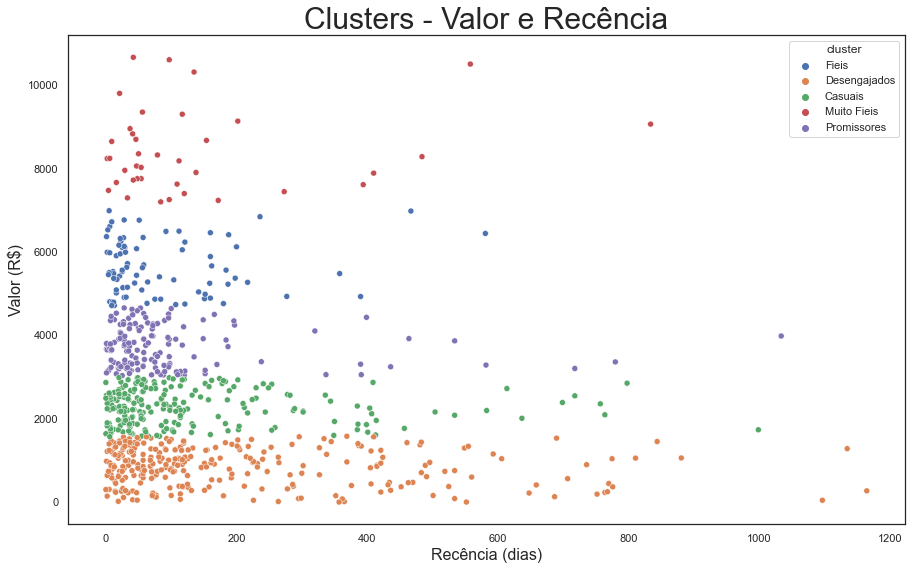

In [49]:
grafico = resultado[['valor', 'recencia', 'cluster']]
grafico['cluster'] = grafico['cluster'].replace({0: 'Desengajados',
                                                 1: 'Promissores',
                                                 2: 'Muito Fieis', 
                                                 3: 'Fieis',
                                                 4: 'Casuais'})
sns.set(style="white")
plt.figure(figsize = (15,9))
sns.scatterplot( x = grafico['recencia'], y = grafico['valor'], hue = grafico['cluster'])
plt.title('Clusters - Valor e Recência', fontsize = 30)
plt.xlabel('Recência (dias)', fontsize=16)
plt.ylabel("Valor (R$)", fontsize=16)
plt.show()

### Houve uma clara divisão entre os clusters plotando as duas variáveis mais importantes do ponto de vista de negócios. 

# Escolhido K = 5:
### Os clusters fizeram sentido do ponto de vista de negócios, com divisões claras e características diferentes entre eles

## Teste de predição de um ponto

In [50]:
teste = pd.DataFrame({'recencia': [190], 'frequencia': [4.5], 'valor': [800], 'produtos': [8], 'categorias': [3],
                       'sub-categorias': [6], 'itens': [30], 'ship_first_class': [210], 'ship_second_class': [270],
                       'ship_standard_class': [799], 'ship_same_day': [73], 'segment_consumer': [156],
                       'segment_corporate':[75], 'segment_homeoffice':[55], 'itens_furniture': [1.5],
                       'itens_office':[5], 'itens_tech':[2]})
y_teste = kmeans.predict(teste)
y_teste[0]

0

# DBSCAN

In [51]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler

# Foi usado scaler pois sem scaler praticamente todos pontos eram classificados como outliers
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = DBSCAN(eps=0.6, min_samples=2).fit(X_scaled)

db = X.copy()
db['cluster'] = clustering.labels_
db.groupby('cluster')['recencia', 'frequencia', 'valor'].mean()

,recencia,frequencia,valor
cluster,,,
-1,191.913043,10.130435,5694.539970
0,142.969388,6.176020,2486.977419
1,152.138686,6.000000,2576.097047
2,146.497778,6.262222,2735.897144


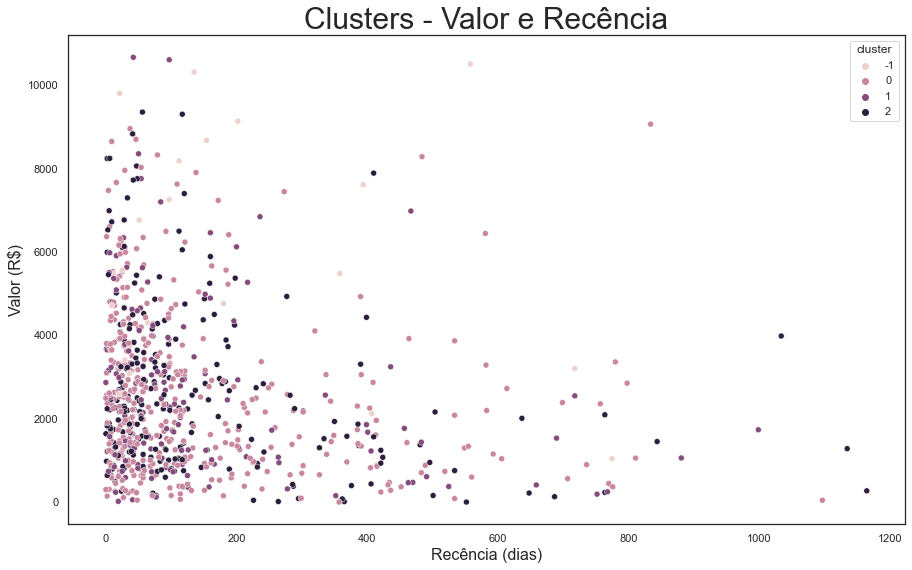

In [52]:
sns.set(style="white")
plt.figure(figsize = (15,9))
sns.scatterplot( x = db['recencia'], y = db['valor'], hue = db['cluster'])
plt.title('Clusters - Valor e Recência', fontsize = 30)
plt.xlabel('Recência (dias)', fontsize=16)
plt.ylabel("Valor (R$)", fontsize=16)
plt.show()

# Com DBSCAN os clusters não fizeram sentido do ponto de vista de negócios pois não tiveram características diferentes em relação ao RFV (recência, frequência e valor)

_________________________________________________________________________________________________________________________________________________________
# Produto - Recomendação de Produtos e Ofertas personalizadas para clientes de cada cluster

### Primeiramente foram verificadas os produtos mais comprados de cada cluster

In [53]:
categ = pd.merge(df, resultado[['customer_id', 'cluster']], on='customer_id', how = 'inner')
categ1 = pd.DataFrame(categ.groupby(['cluster', 'product_id'])['quantity'].count())
categ1.columns=['count']
categ1 = categ1.reset_index()
categ1

,cluster,product_id,count
0,0,FUR-BO-10000330,2
1,0,FUR-BO-10000362,1
2,0,FUR-BO-10000468,2
3,0,FUR-BO-10000780,2
4,0,FUR-BO-10001337,4
...,...,...,...
5599,4,TEC-PH-10004908,4
5600,4,TEC-PH-10004922,2
5601,4,TEC-PH-10004924,1
5602,4,TEC-PH-10004959,1


In [54]:
prod_pref = []
clusters = [0, 1, 2, 3, 4]
for i in clusters:
    a = np.array(categ1[categ1['cluster']==i].sort_values(by = 'count', ascending = False)['product_id'])[0]
    prod_pref.append(a)

pref = pd.DataFrame()
pref['cluster'] = clusters
pref['produto'] = prod_pref
pref

,cluster,produto
0,0,FUR-CH-10001146
1,1,TEC-AC-10003832
2,2,OFF-ST-10003208
3,3,FUR-TA-10001039
4,4,OFF-AP-10002311


In [55]:
# descrição dos produtos favoritos
nome = df[['product_id','product_name']].drop_duplicates()
pref = pd.merge(pref, nome, left_on = 'produto', right_on = 'product_id', how = 'left')
pref

,cluster,produto,product_id,product_name
0,0,FUR-CH-10001146,FUR-CH-10001146,"Global Value Mid-Back Manager's Chair, Gray"
1,0,FUR-CH-10001146,FUR-CH-10001146,"Global Task Chair, Black"
2,1,TEC-AC-10003832,TEC-AC-10003832,Logitech P710e Mobile Speakerphone
3,1,TEC-AC-10003832,TEC-AC-10003832,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive
4,2,OFF-ST-10003208,OFF-ST-10003208,Adjustable Depth Letter/Legal Cart
5,3,FUR-TA-10001039,FUR-TA-10001039,KI Adjustable-Height Table
6,4,OFF-AP-10002311,OFF-AP-10002311,Holmes Replacement Filter for HEPA Air Cleaner...


### Com os produtos mais comprados de cada cluster, foram montadas recomendações de campanhas de acordo com a Persona de cada cluster (analisando Recência, Frequência e Valor) e o produto mais comprado de cada cluster.

In [56]:
recomendacao = ['Promoção cadeira de escritório com 15% OFF usando o cupom CADEIRA15',
                'Confira os novos modelos de viva-voz de conferência, não perca tempo!',
                'Carrinho organizador para escritório com 5% OFF usando o cupom CARRINHO5, confira!',
                'Mesa com altura regulável - Compre 3 e ganhe 20% de desconto no terceiro item',
                'Filtros para purificador de ar com 10% OFF com o cupom FILTRO10, venha conferir!']
rec = pd.DataFrame()
rec['cluster'] = clusters
rec['recomendacao'] = recomendacao
rec

,cluster,recomendacao
0,0,Promoção cadeira de escritório com 15% OFF usa...
1,1,Confira os novos modelos de viva-voz de confer...
2,2,Carrinho organizador para escritório com 5% OF...
3,3,Mesa com altura regulável - Compre 3 e ganhe 2...
4,4,Filtros para purificador de ar com 10% OFF com...


## Por fim, foram criados nomes em cada segmento de acordo com as característica de cada um deles. 

In [57]:
clusters = final[['cluster', 'valor', 'recencia', 'frequencia', '%_clientes', '%_receita']]
clusters['cluster'] = clusters['cluster'].replace({0: 'Desengajados',
                                                   1: 'Promissores',
                                                   2: 'Muito Fieis', 
                                                   3: 'Fieis',
                                                   4: 'Casuais'})
clusters['valor'] = clusters['valor'].astype(int)
clusters['recencia'] = clusters['recencia'].astype(int)
clusters['frequencia'] = clusters['frequencia'].round(1)
clusters['recomendacao'] = rec['recomendacao']
clusters

,cluster,valor,recencia,frequencia,%_clientes,%_receita,recomendacao
0,Desengajados,859,199,4.7,37.1,11.9,Promoção cadeira de escritório com 15% OFF usa...
1,Promissores,3703,100,7.4,18.5,25.7,Confira os novos modelos de viva-voz de confer...
2,Muito Fieis,8405,137,8.5,4.9,15.4,Carrinho organizador para escritório com 5% OF...
3,Fieis,5638,88,8.0,10.4,22.0,Mesa com altura regulável - Compre 3 e ganhe 2...
4,Casuais,2289,132,6.6,29.1,24.9,Filtros para purificador de ar com 10% OFF com...


# Dessa maneira, é possível os clientes receberem ofertas personalizadas de acordo com seu cluster.